In [786]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import utm
from sklearn.linear_model import LinearRegression
pd.set_option("display.precision", 12)

In [787]:
# read files
imu = pd.read_csv('Multisense-imu-imu_data.csv')
lgps = pd.read_csv('Velodyne_Lidar-gps.csv')
gps = pd.read_csv('fmData-gps_rx.csv')
gt = pd.read_csv('tractor_gps_coordinates.csv')

## Show data collections structure

In [788]:
print(imu.columns)
imu.head()

Index(['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs',
       'frame_id', 'orientation', 'x', 'y', 'z', 'w', 'orientation_covariance',
       'angular_velocity', 'x.1', 'y.1', 'z.1', 'angular_velocity_covariance',
       'linear_acceleration', 'x.2', 'y.2', 'z.2',
       'linear_acceleration_covariance'],
      dtype='object')


,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,orientation,x,y,...,angular_velocity,x.1,y.1,z.1,angular_velocity_covariance,linear_acceleration,x.2,y.2,z.2,linear_acceleration_covariance
0,1477388576329285863,NaN,1217671,NaN,1477388576,217797000,"""/Multisense/accel""",NaN,0.0,0.0,...,NaN,-0.497549731186,-0.086284713231,-0.041080687102,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-10.002783981997,4.236472909890,-4.864098612766,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
1,1477388576329294900,NaN,1217680,NaN,1477388576,257332000,"""/Multisense/accel""",NaN,0.0,0.0,...,NaN,-0.393855359665,-0.086895584128,-0.097738436447,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2,1477388576329298659,NaN,1217681,NaN,1477388576,259756000,"""/Multisense/accel""",NaN,0.0,0.0,...,NaN,-0.366366443920,-0.086131997587,-0.108428581445,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
3,1477388576329543630,NaN,1217682,NaN,1477388576,262180000,"""/Multisense/accel""",NaN,0.0,0.0,...,NaN,-0.336586743584,-0.085062988081,-0.119576873373,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
4,1477388576329553851,NaN,1217683,NaN,1477388576,264604000,"""/Multisense/accel""",NaN,0.0,0.0,...,NaN,-0.304363592948,-0.083230392033,-0.129656147473,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."


In [789]:
print(lgps.columns)
lgps.head()

Index(['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs',
       'frame_id', 'hour', 'min', 'sec', 'status', 'latitude',
       'lat_hemisphere', 'longitude', 'long_hemisphere', 'speed', 'course',
       'date', 'month', 'year', 'mag_variation', 'mag_var_direction', 'mode'],
      dtype='object')


,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,hour,min,sec,...,longitude,long_hemisphere,speed,course,date,month,year,mag_variation,mag_var_direction,mode
0,1477388576323879299,NaN,543982,NaN,1477388576,314732420,"""Velodyne_32e_GPS""",9,43,16,...,823.349426269531,"""E""",3.200000047684,181.5,25,10,16,1.299999952316,"""E""","""D"""
1,1477388576324184927,NaN,543983,NaN,1477388576,323570354,"""Velodyne_32e_GPS""",9,43,16,...,823.349426269531,"""E""",3.200000047684,181.5,25,10,16,1.299999952316,"""E""","""D"""
2,1477388576332687039,NaN,543984,NaN,1477388576,332424434,"""Velodyne_32e_GPS""",9,43,16,...,823.349426269531,"""E""",3.200000047684,181.5,25,10,16,1.299999952316,"""E""","""D"""
3,1477388576341846773,NaN,543985,NaN,1477388576,341273177,"""Velodyne_32e_GPS""",9,43,16,...,823.349426269531,"""E""",3.200000047684,181.5,25,10,16,1.299999952316,"""E""","""D"""
4,1477388576352035610,NaN,543986,NaN,1477388576,350131543,"""Velodyne_32e_GPS""",9,43,16,...,823.349426269531,"""E""",3.200000047684,181.5,25,10,16,1.299999952316,"""E""","""D"""


In [790]:
print(gps.columns)
gps.head()

Index(['rosbagTimestamp', 'header', 'seq', 'stamp', 'secs', 'nsecs',
       'frame_id', 'data'],
      dtype='object')


,rosbagTimestamp,header,seq,stamp,secs,nsecs,frame_id,data
0,1477388576329747798,NaN,192956,NaN,1477388576,328723220,'',"""\n$GPGGA,094317.30,5603.98019370,N,00823.3474..."
1,1477388576330483126,NaN,192957,NaN,1477388576,330391673,'',"""\n$GPHDT,122.425,T*37"""
2,1477388576387685298,NaN,192958,NaN,1477388576,378621201,'',"""\n$GPGGA,094317.35,5603.98013820,N,00823.3474..."
3,1477388576387739043,NaN,192959,NaN,1477388576,379468496,'',"""\n$GPHDT,122.588,T*31"""
4,1477388576435028142,NaN,192960,NaN,1477388576,434923984,'',"""\n$GPGGA,094317.40,5603.98008592,N,00823.3473..."


In [791]:
print(gt.columns)
gt.head()

Index(['clock', 'lat', 'lon', 'alt'], dtype='object')


,clock,lat,lon,alt
0,1.477388576379e+09,56.0663378542,8.38911763634,60.1884556885
1,1.477388576392e+09,56.0663378542,8.38911763634,60.1884556885
2,1.477388576481e+09,56.0663378542,8.38911763634,60.1884556885
3,1.477388576544e+09,56.0663371921,8.38911699351,60.1955100484
4,1.477388576579e+09,56.0663353559,8.38911532428,60.2145430893


## Remove useless columns

In [792]:
imu = imu.drop(columns=['rosbagTimestamp', 'header', 'seq', 'stamp','frame_id', 'orientation', 'x', 'y', 'z', 'w','orientation_covariance'])
imu.head()

,secs,nsecs,angular_velocity,x.1,y.1,z.1,angular_velocity_covariance,linear_acceleration,x.2,y.2,z.2,linear_acceleration_covariance
0,1477388576,217797000,NaN,-0.497549731186,-0.086284713231,-0.041080687102,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-10.002783981997,4.236472909890,-4.864098612766,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
1,1477388576,257332000,NaN,-0.393855359665,-0.086895584128,-0.097738436447,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2,1477388576,259756000,NaN,-0.366366443920,-0.086131997587,-0.108428581445,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
3,1477388576,262180000,NaN,-0.336586743584,-0.085062988081,-0.119576873373,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
4,1477388576,264604000,NaN,-0.304363592948,-0.083230392033,-0.129656147473,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."


In [793]:
lgps = lgps.drop(columns=['rosbagTimestamp', 'header', 'seq', 'stamp', 'frame_id', 'hour', 'min', 'sec', 'status', 'lat_hemisphere', 'long_hemisphere',
       'date', 'month', 'year', 'mag_variation', 'mag_var_direction', 'mode'])
lgps.head()

,secs,nsecs,latitude,longitude,speed,course
0,1477388576,314732420,5603.98583984375,823.349426269531,3.200000047684,181.5
1,1477388576,323570354,5603.98583984375,823.349426269531,3.200000047684,181.5
2,1477388576,332424434,5603.98583984375,823.349426269531,3.200000047684,181.5
3,1477388576,341273177,5603.98583984375,823.349426269531,3.200000047684,181.5
4,1477388576,350131543,5603.98583984375,823.349426269531,3.200000047684,181.5


In [794]:
gps = gps.drop(columns=['rosbagTimestamp', 'header', 'seq', 'stamp', 'frame_id'])
gps.head()

,secs,nsecs,data
0,1477388576,328723220,"""\n$GPGGA,094317.30,5603.98019370,N,00823.3474..."
1,1477388576,330391673,"""\n$GPHDT,122.425,T*37"""
2,1477388576,378621201,"""\n$GPGGA,094317.35,5603.98013820,N,00823.3474..."
3,1477388576,379468496,"""\n$GPHDT,122.588,T*31"""
4,1477388576,434923984,"""\n$GPGGA,094317.40,5603.98008592,N,00823.3473..."


In [795]:
gt = gt.drop(columns=['alt'])
gt.head()

,clock,lat,lon
0,1.477388576379e+09,56.0663378542,8.38911763634
1,1.477388576392e+09,56.0663378542,8.38911763634
2,1.477388576481e+09,56.0663378542,8.38911763634
3,1.477388576544e+09,56.0663371921,8.38911699351
4,1.477388576579e+09,56.0663353559,8.38911532428


## Transform index to timestamp

In [796]:
imu['time'] = imu['secs'] + imu['nsecs']*1e-9
imu['time'] = [pd.Timestamp(imu['time'][i], unit='s') for i in range(imu.shape[0])]
imu = imu.set_index('time')
imu = imu.drop(columns=['secs','nsecs'])
imu

,angular_velocity,x.1,y.1,z.1,angular_velocity_covariance,linear_acceleration,x.2,y.2,z.2,linear_acceleration_covariance
time,,,,,,,,,,
2016-10-25 09:42:56.217797041,NaN,-0.497549731186,-0.086284713231,-0.041080687102,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-10.002783981997,4.236472909890,-4.864098612766,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.257332087,NaN,-0.393855359665,-0.086895584128,-0.097738436447,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.259756088,NaN,-0.366366443920,-0.086131997587,-0.108428581445,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.262180089,NaN,-0.336586743584,-0.085062988081,-0.119576873373,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.264604092,NaN,-0.304363592948,-0.083230392033,-0.129656147473,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-9.335931015104,7.453054490998,-3.648073886509,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
...,...,...,...,...,...,...,...,...,...,...
2016-10-25 09:43:56.201175928,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.080680193874,1.098344833902,-4.550285761328,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:43:56.211594105,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.159132968342,0.196133013882,-5.256364530933,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:43:56.222012043,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-7.570733944961,-0.706078842670,-5.923216913304,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."


In [797]:
lgps['time'] = lgps['secs'] + lgps['nsecs']*1e-9
lgps['time'] = [pd.Timestamp(lgps['time'][i], unit='s') for i in range(lgps.shape[0])]
lgps = lgps.set_index('time')
lgps = lgps.drop(columns=['secs','nsecs'])
lgps

,latitude,longitude,speed,course
time,,,,
2016-10-25 09:42:56.314732313,5603.98583984375,823.349426269531,3.200000047684,181.5
2016-10-25 09:42:56.323570251,5603.98583984375,823.349426269531,3.200000047684,181.5
2016-10-25 09:42:56.332424402,5603.98583984375,823.349426269531,3.200000047684,181.5
2016-10-25 09:42:56.341273069,5603.98583984375,823.349426269531,3.200000047684,181.5
2016-10-25 09:42:56.350131512,5603.98583984375,823.349426269531,3.200000047684,181.5
...,...,...,...,...
2016-10-25 09:43:56.276209116,5603.96582031250,823.315979003906,4.599999904633,14.5
2016-10-25 09:43:56.285037518,5603.96582031250,823.315979003906,4.599999904633,14.5
2016-10-25 09:43:56.293884993,5603.96582031250,823.315979003906,4.599999904633,14.5


In [798]:
gps['time'] = gps['secs'] + gps['nsecs']*1e-9
gps['time'] = [pd.Timestamp(gps['time'][i], unit='s') for i in range(gps.shape[0])]
gps = gps.set_index('time')
gps = gps.drop(columns=['secs','nsecs'])
gps

,data
time,
2016-10-25 09:42:56.328723192,"""\n$GPGGA,094317.30,5603.98019370,N,00823.3474..."
2016-10-25 09:42:56.330391645,"""\n$GPHDT,122.425,T*37"""
2016-10-25 09:42:56.378621101,"""\n$GPGGA,094317.35,5603.98013820,N,00823.3474..."
2016-10-25 09:42:56.379468441,"""\n$GPHDT,122.588,T*31"""
2016-10-25 09:42:56.434923887,"""\n$GPGGA,094317.40,5603.98008592,N,00823.3473..."
...,...
2016-10-25 09:43:56.181709051,"""\n$GPHDT,288.512,T*31"""
2016-10-25 09:43:56.236731291,"""\n$GPGGA,094417.20,5603.96380812,N,00823.3111..."
2016-10-25 09:43:56.238507986,"""\n$GPHDT,288.258,T*38"""


In [799]:
gt['time'] = [pd.Timestamp(gt['clock'][i], unit='s') for i in range(gt.shape[0])]
gt = gt.set_index('time')
gt = gt.drop(columns=['clock'])
gt

,lat,lon
time,,
2016-10-25 09:42:56.379468441,56.0663378542,8.38911763634
2016-10-25 09:42:56.391753435,56.0663378542,8.38911763634
2016-10-25 09:42:56.480978251,56.0663378542,8.38911763634
2016-10-25 09:42:56.543994665,56.0663371921,8.38911699351
2016-10-25 09:42:56.579198360,56.0663353559,8.38911532428
...,...,...
2016-10-25 09:52:22.108786106,56.0664352102,8.38892851548
2016-10-25 09:52:22.153131485,56.0664361876,8.38892888246
2016-10-25 09:52:22.153131485,56.0664361876,8.38892888246


In [800]:
# align lgps and gt longitude and latitude
lgps['latitude'] = lgps['latitude']/100
lgps['longitude'] = lgps['longitude']/100

lgps = lgps.rename(columns={"latitude": "lat", "longitude": "lon"})

## Set equal time span for all dataframes

In [801]:
max_start_time = max(imu.index[0],lgps.index[0],gps.index[0],gt.index[0])
min_end_time = min(imu.index[imu.shape[0]-1],lgps.index[lgps.shape[0]-1],gps.index[gps.shape[0]-1],gt.index[gt.shape[0]-1])

In [802]:
imu = imu[(imu.index >= max_start_time) & (imu.index <= min_end_time)]
imu

,angular_velocity,x.1,y.1,z.1,angular_velocity_covariance,linear_acceleration,x.2,y.2,z.2,linear_acceleration_covariance
time,,,,,,,,,,
2016-10-25 09:42:56.381150961,NaN,0.097738436447,-0.166766215354,-0.037873646100,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.629852537760,-5.099458397475,-4.707192187047,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.383569002,NaN,0.078801613397,-0.162337445041,-0.031001410922,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.629852537760,-5.099458397475,-4.707192187047,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.385987043,NaN,0.060475657084,-0.155770639069,-0.023365595444,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.629852537760,-5.099458397475,-4.707192187047,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.388405085,NaN,0.042760567506,-0.148134823592,-0.015882496651,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.629852537760,-5.099458397475,-4.707192187047,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:42:56.390822887,NaN,0.025503622779,-0.140804439402,-0.008552113501,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.629852537760,-5.099458397475,-4.707192187047,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
...,...,...,...,...,...,...,...,...,...,...
2016-10-25 09:43:56.201175928,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.080680193874,1.098344833902,-4.550285761328,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:43:56.211594105,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-8.159132968342,0.196133013882,-5.256364530933,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."
2016-10-25 09:43:56.222012043,NaN,-0.017715091658,-0.077427172603,-0.049174653672,"[8.79376936e-06, -3.56007627e-07, 2.22611968e-...",NaN,-7.570733944961,-0.706078842670,-5.923216913304,"[0.000698179077, 2.46789341e-06, -2.50549745e-..."


In [803]:
lgps = lgps[(lgps.index >= max_start_time) & (lgps.index <= min_end_time)]
lgps

,lat,lon,speed,course
time,,,,
2016-10-25 09:42:56.385533571,56.039858398438,8.233494262695,3.200000047684,181.5
2016-10-25 09:42:56.394394159,56.039858398438,8.233494262695,3.200000047684,181.5
2016-10-25 09:42:56.403223276,56.039858398438,8.233494262695,3.200000047684,181.5
2016-10-25 09:42:56.412053108,56.039858398438,8.233494262695,3.200000047684,181.5
2016-10-25 09:42:56.420910835,56.039858398438,8.233494262695,3.200000047684,181.5
...,...,...,...,...
2016-10-25 09:43:56.205429792,56.039658203125,8.233159790039,4.599999904633,14.5
2016-10-25 09:43:56.214253902,56.039658203125,8.233159790039,4.599999904633,14.5
2016-10-25 09:43:56.223106623,56.039658203125,8.233159790039,4.599999904633,14.5


In [804]:
gps = gps[(gps.index >= max_start_time) & (gps.index <= min_end_time)]
gps

,data
time,
2016-10-25 09:42:56.379468441,"""\n$GPHDT,122.588,T*31"""
2016-10-25 09:42:56.434923887,"""\n$GPGGA,094317.40,5603.98008592,N,00823.3473..."
2016-10-25 09:42:56.436523676,"""\n$GPHDT,123.425,T*36"""
2016-10-25 09:42:56.478287697,"""\n$GPGGA,094317.45,5603.98003704,N,00823.3473..."
2016-10-25 09:42:56.480978251,"""\n$GPHDT,124.110,T*32"""
...,...
2016-10-25 09:43:56.134692907,"""\n$GPHDT,288.321,T*37"""
2016-10-25 09:43:56.180584192,"""\n$GPGGA,094417.15,5603.96374314,N,00823.3111..."
2016-10-25 09:43:56.181709051,"""\n$GPHDT,288.512,T*31"""


In [805]:
gt = gt[(gt.index >= max_start_time) & (gt.index <= min_end_time)]
gt

,lat,lon
time,,
2016-10-25 09:42:56.379468441,56.0663378542,8.38911763634
2016-10-25 09:42:56.391753435,56.0663378542,8.38911763634
2016-10-25 09:42:56.480978251,56.0663378542,8.38911763634
2016-10-25 09:42:56.543994665,56.0663371921,8.38911699351
2016-10-25 09:42:56.579198360,56.0663353559,8.38911532428
...,...,...
2016-10-25 09:43:55.981958628,56.0660542552,8.38854041427
2016-10-25 09:43:56.048447847,56.0660557495,8.38854071887
2016-10-25 09:43:56.109735489,56.0660570575,8.38854127900


## Retrieve gps data from gps string

In [806]:
def read_gps(d):
    data = d.split(',')
    msg_type = data[0].strip('"\\n')
    head = 0.0
    lat = 0.0
    lon = 0.0
    if msg_type == '$GPHDT':
        head = float(data[1])
    elif msg_type == '$GPGGA':
        lat = float(data[2])
        lon = float(data[4])
    return [msg_type,head,lat,lon]

In [807]:
gps.insert(1, "msg_type", ['']*gps.shape[0], False)
gps.insert(2, "heading", [0.0]*gps.shape[0], False)
gps.insert(3, "lat", [0.0]*gps.shape[0], False)
gps.insert(4, "lon", [0.0]*gps.shape[0], False)
for idx,d in enumerate(gps['data']):
    data = read_gps(d)
    gps['msg_type'][idx] = data[0]
    gps['heading'][idx] = data[1]
    gps['lat'][idx] = data[2]
    gps['lon'][idx] = data[3]

/tmp/ipykernel_137/2568619123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['msg_type'][idx] = data[0]
/tmp/ipykernel_137/2568619123.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['heading'][idx] = data[1]
/tmp/ipykernel_137/2568619123.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps['lat'][idx] = data[2]
/tmp/ipykernel_137/2568619123.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [808]:
gps_corr = gps[gps['msg_type'] == '$GPGGA']
gps_corr = gps_corr.drop(columns=['data','msg_type','heading'])
gps_corr

,lat,lon
time,,
2016-10-25 09:42:56.434923887,5603.98008592,823.34739356
2016-10-25 09:42:56.478287697,5603.98003704,823.34732802
2016-10-25 09:42:56.532011032,5603.97998637,823.34727386
2016-10-25 09:42:56.577514648,5603.97993505,823.34722293
2016-10-25 09:42:56.634702206,5603.97987876,823.34718325
...,...,...
2016-10-25 09:43:56.046825647,5603.96353579,823.31104650
2016-10-25 09:43:56.079937458,5603.96360334,823.31108118
2016-10-25 09:43:56.133031845,5603.96367207,823.31111582


In [809]:
# align gps_corr and gt longitude and latitude
gps_corr['lat'] = gps_corr['lat']/100
gps_corr['lon'] = gps_corr['lon']/100

## Plots

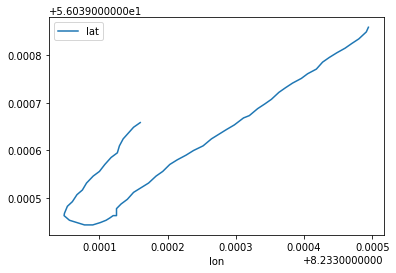

In [810]:
lgps.plot(x='lon', y='lat')
plt.show()

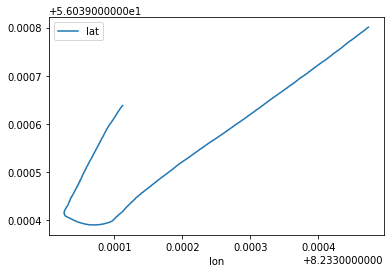

In [811]:
gps_corr.plot(x='lon', y='lat')
plt.show()

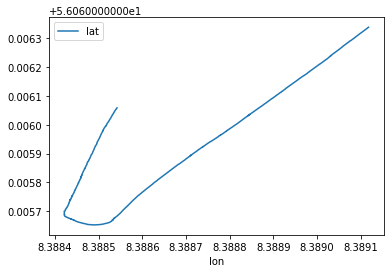

In [812]:
gt.plot(x='lon', y='lat')
plt.show()

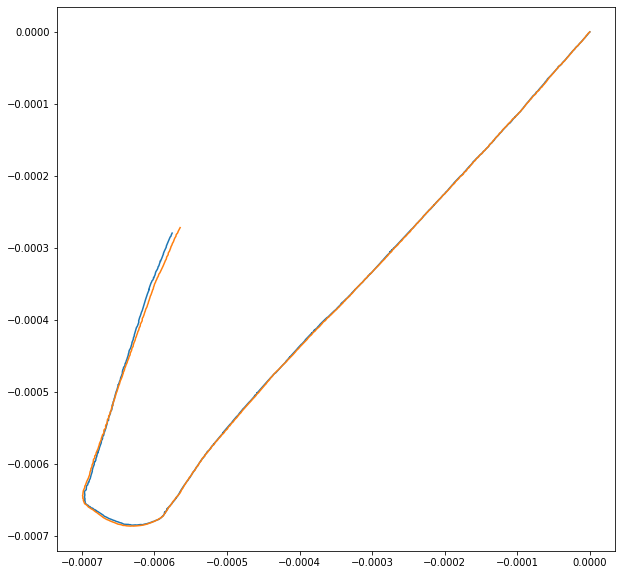

In [814]:
plt.figure(figsize=(10,10))
plt.plot(gt['lon'].values-gt['lon'][0],gt['lat'].values-gt['lat'][0])
plt.plot((gps_corr['lon'].values-gps_corr['lon'][0])*1.56,(gps_corr['lat'].values-gps_corr['lat'][0])*1.67)
# plt.plot(lgps['lon'].values,lgps['lat'].values)
plt.show()

## Adjust relevant data

In [815]:
gps_corr['lon'] = (gps_corr['lon'].values-gps_corr['lon'][0])*1.56 + gt['lon'][0]
gps_corr['lat'] = (gps_corr['lat'].values-gps_corr['lat'][0])*1.67 + gt['lat'][0]

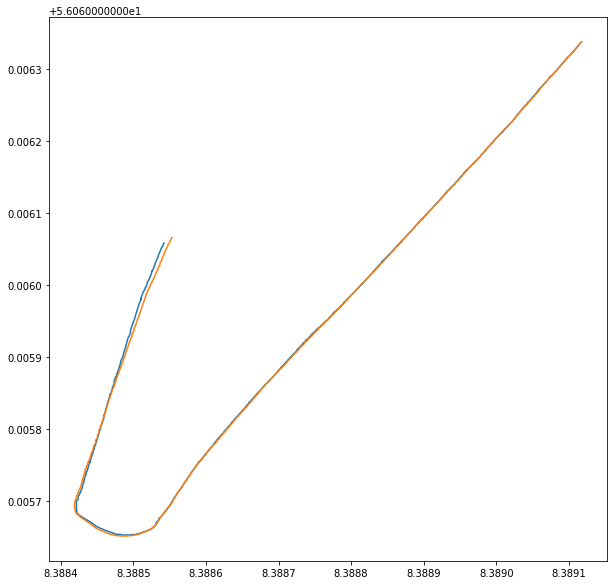

In [816]:
plt.figure(figsize=(10,10))
plt.plot(gt['lon'].values,gt['lat'].values)
plt.plot(gps_corr['lon'],gps_corr['lat'])
plt.show()

### Take only relevant part

In [817]:
min_time = pd.Timestamp('2016-10-25 09:42:58')
max_time = pd.Timestamp('2016-10-25 09:43:28')

In [818]:
lgps = lgps[(lgps.index >= min_time) & (lgps.index <= max_time)]
gps_corr = gps_corr[(gps_corr.index >= min_time) & (gps_corr.index <= max_time)]
gt = gt[(gt.index >= min_time) & (gt.index <= max_time)]

### Resample

In [819]:
lgps = lgps.resample('100ms').mean()
gps_corr = gps_corr.resample('100ms').mean()
gt = gt.resample('100ms').mean().interpolate('linear')

## To cartesian coordinates

In [820]:
lgps_xy = pd.DataFrame(index=lgps.index, columns=['x','y']) 
gps_xy = pd.DataFrame(index=gps_corr.index, columns=['x','y'])
gt_xy = pd.DataFrame(index=gt.index, columns=['x','y'])

def to_cartesian(d_latlon, d_xy):
    for idx in range(d_xy.shape[0]):
        pos = utm.from_latlon(d_latlon['lat'][idx],d_latlon['lon'][idx])
        d_xy['x'][idx] = pos[0]
        d_xy['y'][idx] = pos[1]

to_cartesian(lgps,lgps_xy)
to_cartesian(gps_corr,gps_xy)
to_cartesian(gt,gt_xy)

### Fix angle

In [821]:
def fix_angle(d_xy):
    # adjust origin
    start_x = d_xy['x'][0]
    start_y = d_xy['y'][0]
    d_xy['x'] = d_xy['x'] - start_x
    d_xy['y'] = d_xy['y'] - start_y
    # Regression
    linear_regressor = LinearRegression()  
    linear_regressor.fit(d_xy['x'].values.reshape(-1,1), d_xy['y'].values.reshape(-1,1))  
    k = linear_regressor.coef_[0][0]
    q = linear_regressor.intercept_[0]
    d_xy['y'] = d_xy['y'] - q
    theta = np.pi - np.arctan(k)
    d_xy['x1'] = d_xy['x'] * np.cos(theta) - d_xy['y'] * np.sin(theta)
    d_xy['y1'] = d_xy['x'] * np.sin(theta) + d_xy['y'] * np.cos(theta)
    # adjust origin again on x axis
    d_xy['x1'] = d_xy['x1'] - d_xy['x1'][0]

In [822]:
fix_angle(lgps_xy)
fix_angle(gps_xy)
fix_angle(gt_xy)

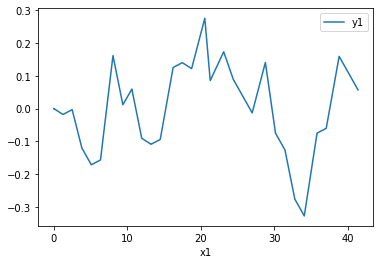

In [823]:
lgps_xy.plot(x='x1', y='y1')
plt.show()

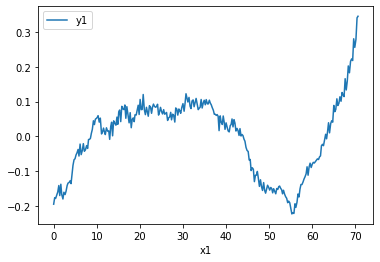

In [824]:
gps_xy.plot(x='x1', y='y1')
plt.show()

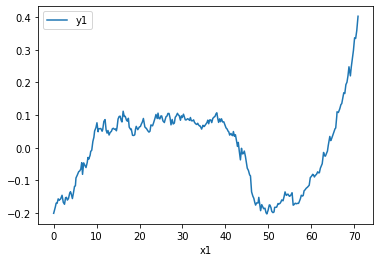

In [825]:
gt_xy.plot(x='x1', y='y1')
plt.show()

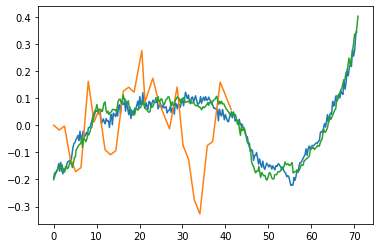

In [827]:
plt.plot(gps_xy['x1'].values,gps_xy['y1'].values)
plt.plot(lgps_xy['x1'].values,lgps_xy['y1'].values)
plt.plot(gt_xy['x1'].values,gt_xy['y1'].values)
plt.show()

## Compute velocity

In [828]:
s_gps = gps_xy['x1'][-1] - gps_xy['x1'][0]   # [m]
t_gps = gps_xy.index[-1].timestamp() - gps_xy.index[0].timestamp()   # [s]
v_gps = s_gps/t_gps

In [832]:
v_gps

2.3613185773859198

## Save dataset

In [829]:
data = pd.DataFrame(columns=['t','x_gt','y_gt','x_gps','y_gps'])
data['t'] = (gps_xy.index[0:] - gps_xy.index[0]).total_seconds().values
data['x_gt'] = gt_xy['x1'].values
data['y_gt'] = gt_xy['y1'].values
data['x_gps'] = gps_xy['x1'].values
data['y_gps'] = gps_xy['y1'].values

In [830]:
data.to_csv('dataset_gt_gps.csv')

# Some more stuff

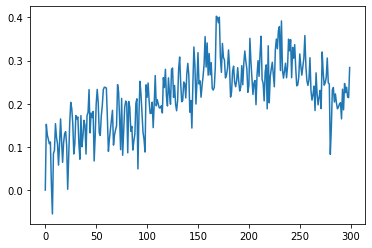

In [831]:
plt.plot(data['x_gt'].values-data['x_gps'].values)
plt.show()